In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

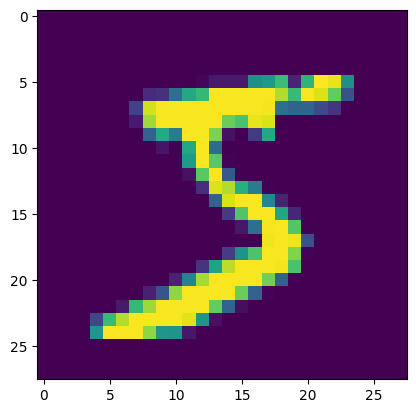

In [3]:
plt.imshow(x_train[0])

In [4]:
#scaling our data:
x_train = x_train/255
x_test = x_test/255


In [5]:
#creating the model:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape


In [21]:
# encoder will go from 784 -> 500 ->200 -> 100 -> 50 ->25
encoder = Sequential()
encoder.add(Flatten())
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

decoder = Sequential()
decoder.add(Dense(50, activation='relu', input_shape=[25]))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='relu'))
decoder.add(Reshape([28,28]))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='adam')

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [22]:
autoencoder.fit(x_train,x_train, epochs=5, validation_data=[x_test, x_test])

Epoch 1/5
1875/1875 [==============================] - 55s 27ms/step - loss: 0.0285 - val_loss: 0.0199
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0188 - val_loss: 0.0179
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0168 - val_loss: 0.0157
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0155 - val_loss: 0.0152
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0147 - val_loss: 0.0143


In [24]:
x_test[0].shape

(28, 28)

In [25]:
x_train[0].shape

(28, 28)

1/1 [==============================] - 0s 47ms/step


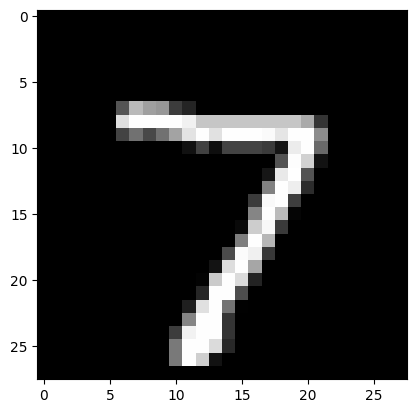

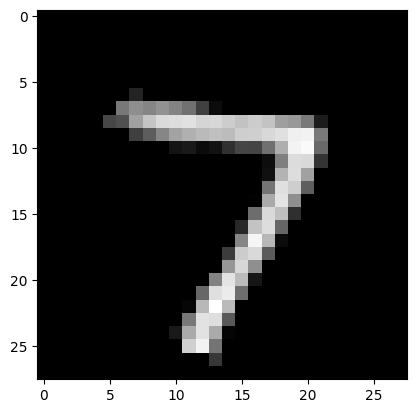

In [29]:
passed_image= autoencoder.predict(x_test[:10])
plt.imshow(x_test[0], cmap='gray')
plt.show()
plt.imshow(passed_image[0], cmap='gray')

In [30]:
x_test[:10].shape

(10, 28, 28)

In [33]:
x_train[0].shape

(28, 28)

In [36]:
x_train[:1].shape

(1, 28, 28)